## Attention

Before you learn this part of knowledge, please refer to the pictures that show the structure of the following nets firstly!

## AlexNet

In [36]:
import torch
from torch import nn

In [37]:
from d2l import torch as d2l
net_Alex = nn.Sequential(
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),  # 记得用全连接层之前先展平
    nn.Linear(6400, 4096), nn.ReLU(),
    # 这里，全连接层的输出数量是LeNet中的好几倍。使用dropout层来减轻过拟合
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 10)
)

In [28]:
X = torch.randn(1, 1, 224, 224)
for layer in net_Alex:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

In [38]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

KeyboardInterrupt: 

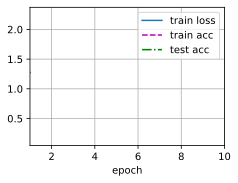

In [30]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net_Alex, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

### Comparision Between LeNet & AlexNet

In [39]:
net_LeNet = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.ReLU(),  # 输出: (1, 6, 224, 224)
    nn.MaxPool2d(kernel_size=2, stride=2),  # 输出: (1, 6, 112, 112)
    nn.Conv2d(6, 16, kernel_size=5), nn.ReLU(),  # 输出: (1, 16, 108, 108)
    nn.MaxPool2d(kernel_size=2, stride=2),  # 输出: (1, 16, 54, 54)
    nn.Conv2d(16, 120, kernel_size=5), nn.ReLU(),  # 输出: (1, 120, 50, 50)
    nn.MaxPool2d(kernel_size=2, stride=2),  # 输出: (1, 120, 25, 25)
    nn.Flatten(),  # 展平: 120 * 25 * 25 = 75000
    nn.Linear(120 * 25 * 25, 120), nn.ReLU(),  # 输出: (1, 120)
    nn.Linear(120, 84), nn.ReLU(),  # 输出: (1, 84)
    nn.Linear(84, 10)  # 输出: (1, 10)
)

In [ ]:
net_AlexNet = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.ReLU(),  # 输出: (1, 6, 224, 224)
    nn.MaxPool2d(kernel_size=2, stride=2),  # 输出: (1, 6, 112, 112)
    nn.Conv2d(6, 16, kernel_size=5, padding=2), nn.ReLU(),  # 输出: (1, 16, 112, 112)
    nn.MaxPool2d(kernel_size=2, stride=2),  # 输出: (1, 16, 56, 56)
    nn.Conv2d(16, 120, kernel_size=3, padding=1), nn.ReLU(),  # 输出: (1, 120, 56, 56)
    nn.Conv2d(120, 120, kernel_size=3, padding=1), nn.ReLU(),  # 输出: (1, 120, 56, 56)
    nn.Conv2d(120, 84, kernel_size=3, padding=1), nn.ReLU(),  # 输出: (1, 84, 56, 56)
    nn.MaxPool2d(kernel_size=2, stride=2),  # 输出: (1, 84, 28, 28)
    nn.Flatten(),  # 展平: 84 * 28 * 28 = 65856
    nn.Linear(84 * 28 * 28, 4096), nn.ReLU(),  # 输出: (1, 4096)
    nn.Dropout(p=0.5),  # 使用dropout层来减轻过拟合
    nn.Linear(4096, 4096), nn.ReLU(),  # 输出: (1, 4096)
    nn.Dropout(p=0.5),
    nn.Linear(4096, 10)  # 输出: (1, 10)
)

In [ ]:
num_epochs = 15


loss 0.184, train acc 0.933, test acc 0.912
676.2 examples/sec on cuda:0


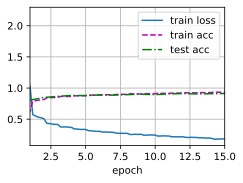

In [25]:
lr = 0.01
d2l.train_ch6(net_AlexNet, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [41]:
num_epochs = 10

In [ ]:
lr = 0.9
d2l.train_ch6(net_LeNet, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

### Simplified AlexNet Model 

In [44]:
net28 = nn.Sequential(
    nn.Conv2d(1, 64, kernel_size=5, stride=2, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=1),
    # nn.Conv2d(64, 96, kernel_size=3, padding=2), nn.ReLU(),
    # nn.MaxPool2d(kernel_size=2, stride=1),

    nn.Conv2d(64, 128, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(128, 128, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(128, 96, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),

    nn.Linear(96 * 5 * 5, 2048), nn.ReLU(),
    nn.Dropout(p=0.5), 
    nn.Linear(2048, 1024), nn.ReLU(),
    nn.Dropout(p=0.5),

    nn.Linear(1024, 10)
)


loss 0.461, train acc 0.828, test acc 0.838
18028.6 examples/sec on cuda:0


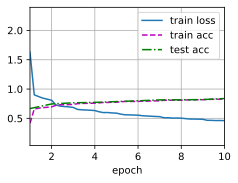

In [45]:
lr, num_epochs = 0.01, 10
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch6(net28, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

### Memory
AlexNet里面不同层需要的参数大小决定了占用显存的大小:

- 第一层卷积层卷积核参数个数：11x11x3x96=34,848
- 第二层卷积层卷积核参数个数：5x5x96x256=614,400
- 第三层卷积层卷积核参数个数：3x3x256x384=884,736
- 第四层卷积层卷积核参数个数：3x3x384x384=1,327,104
- 第五层卷积层卷积核参数个数：3x3x384x256=884,736
- 第一层全连层参数(权重+偏移): 6400x4096+4096=26,218,496
- 第二层全连层参数(权重+偏移): 4096x4096+4096=16,781,312
- 第三层全连层参数(权重+偏移): 4096x1000+1000=4,100,096

所以是第一层全连层占用了最多的显存

### Computation
把运算分为乘法运算、加法运算和特殊运算（ReLu、池化）

1. 卷积层的计算次数：
$$C_{i} \times Co \times Kw \times Kh \times Nw \times Nh + Ci \times Co \times (Kw \times Kh - 1) \times Nw \times Nh + Co \times (Ci - 1) \times Nw \times Nh$$

2. 池化层的计算次数：
$$N_{h} \times N_{w} \times C_{i}$$

全连接层的计算次数：权重与变量相乘、结果相加、偏置项

- 第一层卷积层计算次数：3x96x(2x11x11-1)x54x54+96x2x54x54=202,953,600
- 第一层卷积层的池化层计算次数：26x26x96=64896
- 第二层卷积层卷计算次数：96*256*(2*5*5-1)*26*26+256*95*26*26=830,495,744
- 第二层卷积层的池化层计算次数：12x12x256=36864
- 第三层卷积层计算次数：256*384*(2*3*3-1)*12*12+384*255*12*12=254748672
- 第四层卷积层计算次数：384*384*(2*3*3-1)*12*12+384*383*12*12=382150656
- 第五层卷积层计算次数：384*256*(2*3*3-1)*12*12+256*383*12*12=254767104
- 第五层卷积层池化层计算次数：5x5x256=6400
- 第一层全连层计算次数：6400*4096+4096*(6400-1)+4096=52,428,800
- 第二层全连层计算次数：4096*4096+4096*(4096-1)+4096=33,554,432
- 第三层全连层计算次数：1000*4096+1000*4095+1000=8,192,000

第二层卷积层需要最多次数的计算，卷积层的运算次数与输入通道数、输出通道数、图片大小、卷积核大小都有关。

## VGG (Visual Geometry Group)

In [46]:
import torch
from torch import nn
from d2l import torch as d2l

def vgg_block(num_convs, in_channels, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.Conv2d(in_channels, out_channels,
                                kernel_size=3, padding=1))
        layers.append(nn.ReLU())
        in_channels = out_channels
    layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
    return nn.Sequential(*layers)

In [47]:
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))

In [48]:
# VGG-11
def vgg(conv_arch):
    conv_blks = []
    in_channels = 1
    for (num_convs, out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_convs, in_channels, out_channels))
        in_channels = out_channels
    return nn.Sequential(*conv_blks,
        nn.Flatten(),
        nn.Linear(out_channels * 7 * 7, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 10)
    )

net_vgg = vgg(conv_arch)

In [49]:
X = torch.randn(size=(1, 1, 224, 224))
for blk in net_vgg:
    X = blk(X)
    print(blk.__class__.__name__,'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


In [50]:
ratio = 4  # 减少VGG-11计算量, 以牺牲精确度为代价
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
net = vgg(small_conv_arch)

In [ ]:
"""lr, num_epochs, batch_size = 0.05, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())"""

In [51]:
conv_arch_13 = ((2, 64), (2, 128), (2, 256), (2, 512), (2, 512))

In [52]:
conv_arch_19 = ((2, 64), (2, 128), (4, 256), (4, 512), (4, 512))

In [53]:
net = vgg(conv_arch_19)
X = torch.randn(size=(1, 1, 224, 224))
for blk in net:
    X = blk(X)
    print(blk.__class__.__name__,'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


## NiN

In [54]:
import torch
from torch import nn
from d2l import torch as d2l

In [55]:
def nin_block(in_channels, out_channels, kernel_size, stride, padding):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding),
        nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU()
    )

In [56]:
net_NiN = nn.Sequential(  # 参数数量：in * out * kernel_size * kernel_size
    nin_block(1, 96, kernel_size=11, stride=4, padding=0),
    nn.MaxPool2d(3, stride=2),
    nin_block(96, 256, kernel_size=5, stride=1, padding=2),
    nn.MaxPool2d(3, stride=2),
    nin_block(256, 384, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(3, stride=2),
    nn.Dropout(0.5),
    nin_block(384, 10, kernel_size=3, stride=1, padding=1),
    nn.AdaptiveAvgPool2d((1, 1)),
    nn.Flatten()
)

In [57]:
X = torch.rand(size=(1, 1, 224, 224))  # 形状各个分量的乘积可以反映计算量
for layer in net_NiN:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


loss 0.569, train acc 0.780, test acc 0.788
1378.0 examples/sec on cuda:0


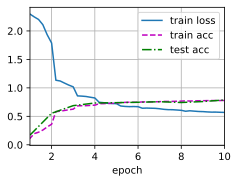

In [58]:
lr, num_epochs, batch_size = 0.1, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net_NiN, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

[参考答案](https://blog.csdn.net/weixin_51580530/article/details/128619145)

## GoogleNet

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

### Inception Block

In [ ]:
class Inception(nn.Module):  # 致敬传奇电影《盗梦空间》(Inception) lol
    def __init__(self, in_channels, c1, c2, c3, c4, **kwargs) -> None:
        super(Inception, self).__init__(**kwargs)
        # 线路1，单1x1卷积层
        self.p1_1 = nn.Conv2d(in_channels, c1, kernel_size=1)
        # 线路2，1x1卷积层后接3x3卷积层
        self.p2_1 = nn.Conv2d(in_channels, c2[0], kernel_size=1)
        self.p2_2 = nn.Conv2d(c2[0], c2[1], kernel_size=3, padding=1)
        # 线路3，1x1卷积层后接5x5卷积层
        self.p3_1 = nn.Conv2d(in_channels, c3[0], kernel_size=1)
        self.p3_2 = nn.Conv2d(c3[0], c3[1], kernel_size=5, padding=2)
        # 线路4，3x3最大汇聚层后接1x1卷积层
        self.p4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.p4_2 = nn.Conv2d(in_channels, c4, kernel_size=1)

    def forward(self, x):
        p1 = F.relu(self.p1_1(x))
        p2 = F.relu(self.p2_2(F.relu(self.p2_1(x))))
        p3 = F.relu(self.p3_2(F.relu(self.p3_1(x))))
        p4 = F.relu(self.p4_2(F.relu(self.p4_1(x))))
        # 在通道维度上连结输出
        return torch.cat((p1, p2 ,p3, p4), dim=1)

In [ ]:
b1 = nn.Sequential(nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
b2 = nn.Sequential(nn.Conv2d(64, 64, kernel_size=1),
                   nn.ReLU(),
                   nn.Conv2d(64, 192, kernel_size=3, padding=1),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
b3 = nn.Sequential(Inception(192, 64, (96, 128), (16, 32), 32),
                    Inception(256, 128, (128, 192), (32, 96), 64),
                    nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
b4 = nn.Sequential(Inception(480, 192, (96, 208), (16, 48), 64),
                   Inception(512, 160, (112, 224), (24, 64), 64),
                   Inception(512, 128, (128, 256), (24, 64), 64),
                   Inception(512, 112, (144, 288), (32, 64), 64),
                   Inception(528, 256, (160, 320), (32, 128), 128),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
b5 = nn.Sequential(Inception(832, 256, (160, 320), (32, 128), 128),
                   Inception(832, 384, (192, 384), (48, 128), 128),
                   nn.AdaptiveAvgPool2d((1, 1)),
                   nn.Flatten())

net_Google = nn.Sequential(b1, b2, b3, b4, b5, nn.Linear(1024, 10))

In [ ]:
X = torch.rand(size=(1, 1, 96, 96))
for layer in net_Google:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

In [ ]:
lr, num_epochs, batch_size = 0.1, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)
d2l.train_ch6(net_Google, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

[参考答案](https://blog.csdn.net/qq_43941037/article/details/133120824)

## Batch Norm

从形式上来说，用$\mathbf{x} \in \mathcal{B}$表示一个来自小批量$\mathcal{B}$的输入，批量规范化$\mathrm{BN}$根据以下表达式转换$\mathbf{x}$：

$$\mathrm{BN}(\mathbf{x}) = \boldsymbol{\gamma} \odot \frac{\mathbf{x} - \hat{\boldsymbol{\mu}}_\mathcal{B}}{\hat{\boldsymbol{\sigma}}_\mathcal{B}} + \boldsymbol{\beta}.$$

在上式中，$\hat{\boldsymbol{\mu}}_\mathcal{B}$是小批量$\mathcal{B}$的样本均值，$\hat{\boldsymbol{\sigma}}_\mathcal{B}$是小批量$\mathcal{B}$的样本标准差。
应用标准化后，生成的小批量的平均值为0和单位方差为1。
由于单位方差（与其他一些魔法数）是一个主观的选择，因此我们通常包含
*拉伸参数*（scale）$\boldsymbol{\gamma}$和*偏移参数*（shift）$\boldsymbol{\beta}$，它们的形状与$\mathbf{x}$相同。
请注意，$\boldsymbol{\gamma}$和$\boldsymbol{\beta}$是需要与其他模型参数一起学习的参数。

由于在训练过程中，中间层的变化幅度不能过于剧烈，而批量规范化将每一层主动居中，并将它们重新调整为给定的平均值和大小（通过$\hat{\boldsymbol{\mu}}_\mathcal{B}$和${\hat{\boldsymbol{\sigma}}_\mathcal{B}}$）。

从形式上来看，我们计算出上式中的$\hat{\boldsymbol{\mu}}_\mathcal{B}$和${\hat{\boldsymbol{\sigma}}_\mathcal{B}}$，如下所示：

$$\begin{aligned} \hat{\boldsymbol{\mu}}_\mathcal{B} &= \frac{1}{|\mathcal{B}|} \sum_{\mathbf{x} \in \mathcal{B}} \mathbf{x},\\
\hat{\boldsymbol{\sigma}}_\mathcal{B}^2 &= \frac{1}{|\mathcal{B}|} \sum_{\mathbf{x} \in \mathcal{B}} (\mathbf{x} - \hat{\boldsymbol{\mu}}_{\mathcal{B}})^2 + \epsilon.\end{aligned}$$

请注意，我们在方差估计值中添加一个小的常量$\epsilon > 0$，以确保我们永远不会尝试除以零，即使在经验方差估计值可能消失的情况下也是如此。估计值$\hat{\boldsymbol{\mu}}_\mathcal{B}$和${\hat{\boldsymbol{\sigma}}_\mathcal{B}}$通过使用平均值和方差的噪声（noise）估计来抵消缩放问题。

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
# 注意：我将源代码中的moving_mean和moving_var改成了mean和var;mean和var改成了m和v
def batch_norm(X, gamma, beta, mean, var, eps, momentum):
    # 通过is_grad_enabled来判断当前模式是训练模式还是预测模式
    if not torch.is_grad_enabled():
        X_hat = (X - mean) / torch.sqrt(var + eps)
    else:
        assert len(X.shape) in (2, 4)
        if len(X.shape) == 2:
        # 使用全连接层的情况，计算特征维上的均值和方差
            m = X.mean(dim=0)
            v = torch.std(X, dim=0)
        else:
            # 使用二维卷积层的情况，计算通道维上（axis=1）的均值和方差。
            # 这里我们需要保持X的形状以便后面可以做广播运算
            m = X.mean(dim=(0, 2, 3), keepdim=True)
            v = ((X - m) ** 2).mean(dim=(0, 2, 3), keepdim=True)
        X_hat = (X - m) / torch.sqrt(v + eps)
        mean = momentum * mean + (1.0 - momentum) * m
        var = momentum * var + (1.0 - momentum) * v
    Y = gamma * X_hat + beta
    return Y, mean.data, var.data

In [ ]:
class BatchNorm(nn.Module):
    # num_features：完全连接层的输出数量或卷积层的输出通道数。
    # num_dims：2表示完全连接层，4表示卷积层
    def __init__(self, num_features, num_dims) -> None:
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        # 参与求梯度和迭代的拉伸和偏移参数，分别初始化成1和0
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        self.mean = torch.zeros(shape)
        self.var = torch.ones(shape)

    def forward(self, X):
        if self.mean.device != X.device:
            self.mean = self.mean.to(X.device)
            self.var = self.var.to(X.device)
        Y, self.mean, self.var = batch_norm(X, self.gamma, self.beta, 
                                            self.mean, self.var,
                                            eps=1e-5, momentum=0.9)
        return Y

### Application on LeNet

In [ ]:
net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5), BatchNorm(6, num_dims=4), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), BatchNorm(16, num_dims=4), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2), nn.Flatten(),
    nn.Linear(16 * 4 * 4, 120), BatchNorm(120, num_dims=2), nn.Sigmoid(),
    nn.Linear(120, 84), BatchNorm(84, num_dims=2), nn.Sigmoid(),
    nn.Linear(84, 10)
)

In [ ]:
lr, num_epochs, batch_size = 0.6, 10, 256  # 一个很大的学习率
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [ ]:
lr, num_epochs, batch_size = 0.6, 10, 256  # 一个很大的学习率
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [ ]:
net[1].gamma.reshape((-1, )), net[1].beta.reshape((-1,))

#### API Implementation

In [ ]:
net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5), nn.BatchNorm2d(6), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), nn.BatchNorm2d(16), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2), nn.Flatten(),
    nn.Linear(256, 120), nn.BatchNorm1d(120), nn.Sigmoid(),
    nn.Linear(120, 84), nn.BatchNorm1d(84), nn.Sigmoid(),
    nn.Linear(84, 10)
)

In [ ]:
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())


In [ ]:
net[1].weight.reshape((-1,)), net[1].bias.reshape((-1,))

#### Delete the Last Two BatchNorm Layers

In [ ]:
net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5), nn.BatchNorm2d(6), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), nn.BatchNorm2d(16), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2), nn.Flatten(),
    nn.Linear(256, 120), nn.Sigmoid(),
    nn.Linear(120, 84), nn.Sigmoid(),
    nn.Linear(84, 10)
)

In [ ]:
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [ ]:
net[1].weight.reshape((-1,)), net[1].bias.reshape((-1,))

#### Replaced with Dropout (Steady But Not Accurate)

In [ ]:
net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5), nn.BatchNorm2d(6), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), nn.BatchNorm2d(16), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2), nn.Flatten(),
    nn.Linear(256, 120), nn.Dropout(0.3), nn.Sigmoid(),
    nn.Linear(120, 84), nn.Dropout(0.3), nn.Sigmoid(),
    nn.Linear(84, 10)
)

In [ ]:
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [ ]:
net[1].weight.reshape((-1,)), net[1].bias.reshape((-1,))

#### Probability Integral Transform

概率积分变换（Probability Integral Transform, PIT）是一个重要的统计工具，用于将随机变量转换成均匀分布的随机变量。这个变换在概率论和数理统计中具有广泛的应用，特别是在蒙特卡洛方法和随机数生成中。基本思想是通过累积分布函数（CDF）将任意分布的随机变量转换为均匀分布的随机变量。

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 生成标准正态分布的随机变量
np.random.seed(0)
num_samples = 10000
X = np.random.randn(num_samples)

# 计算累积分布函数 (CDF)
F_X = stats.norm.cdf(X)

# 应用概率积分变换
U = F_X

# 绘制直方图以验证均匀分布
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(X, bins=50, density=True, alpha=0.6, color='g')
plt.title('Standard Normal Distribution')

plt.subplot(1, 2, 2)
plt.hist(U, bins=50, density=True, alpha=0.6, color='b')
plt.title('Uniform Distribution after Probability Integral Transform')

plt.show()


[参考答案](https://blog.csdn.net/qq_43941037/article/details/133181833)

## ⭐⭐ResNet 

ResNet将函数展开为

$$f(\mathbf{x}) = \mathbf{x} + g(\mathbf{x}).$$

也就是说，ResNet将$f$分解为两部分：一个简单的线性项和一个复杂的非线性项。

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [ ]:
class Residual(nn.Module):
    def __init__(self, input_channels, num_channels, 
                 use_1x1conv=False, stride=1):
        super().__init__()
        self.conv1 = nn.Conv2d(input_channels, num_channels,
                               kernel_size=3, padding=1, stride=stride)
        self.conv2 = nn.Conv2d(num_channels, num_channels,
                               kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.Conv2d(input_channels, num_channels,
                                  kernel_size=1, stride=stride)
        else:
            self.conv3 = None
        self.bn1 = nn.BatchNorm2d(num_channels)
        self.bn2 = nn.BatchNorm2d(num_channels)

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)

In [ ]:
blk = Residual(3, 3)
X = torch.rand(4, 3, 6, 6)
Y = blk(X)
Y.shape

In [ ]:
blk = Residual(3,6, use_1x1conv=True, stride=2)
blk(X).shape

In [ ]:
b1 = nn.Sequential(nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
                   nn.BatchNorm2d(64), nn.ReLU(),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
def resnet_block(input_channels, num_channels, num_residuals,
                 first_block=False):
    blk = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.append(Residual(input_channels, num_channels,
                                use_1x1conv=True, stride=2))
        else:
            blk.append(Residual(num_channels, num_channels))
    return blk

In [ ]:
b2 = nn.Sequential(*resnet_block(64, 64, 2, first_block=True))
b3 = nn.Sequential(*resnet_block(64, 128, 2))
b4 = nn.Sequential(*resnet_block(128, 256, 2))
b5 = nn.Sequential(*resnet_block(256, 512, 2))

In [ ]:
# ResNet-18
net_Res = nn.Sequential(b1, b2, b3, b4, b5,
                    nn.AdaptiveAvgPool2d((1, 1)),
                    nn.Flatten(), nn.Linear(512, 10))

In [ ]:
X = torch.rand(size=(1, 1, 224, 224))
for layer in net_Res:
    X = layer(X)
    print(layer.__class__.__name__, 'outtput shape:\t', X.shape)

In [ ]:
lr, num_epochs, batch_size = 0.05, 10, 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)
d2l.train_ch6(net_Res, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

### One example: ResNet-34

In [ ]:
b1 = nn.Sequential(nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
                   nn.BatchNorm2d(64), nn.ReLU(),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
b2 = nn.Sequential(*resnet_block(64, 64, 3, first_block=True))
b3 = nn.Sequential(*resnet_block(64, 128, 4))
b4 = nn.Sequential(*resnet_block(128, 256, 6))
b5 = nn.Sequential(*resnet_block(256, 512, 3))
net34 = nn.Sequential(b1, b2, b3, b4, b5,
                    nn.AdaptiveAvgPool2d((1,1)),
                    nn.Flatten(), nn.Linear(512, 10))

lr, num_epochs, batch_size = 0.05, 10, 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)
d2l.train_ch6(net34, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

### Another net form: ResNet-50

In [ ]:
# 适配ResNet-50、ResNet-101、ResNet-152
class Residual(nn.Module):
    def __init__(self, input_channels, num_channels, 
                 use_1x1conv=False, stride=1):
        super().__init__()
        self.conv1 = nn.Conv2d(input_channels, num_channels,
                               kernel_size=1, stride=stride)
        self.conv2 = nn.Conv2d(num_channels, num_channels,
                               kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(num_channels, num_channels * 4,
                               kernel_size=1)
        if use_1x1conv:
            self.conv4 = nn.Conv2d(input_channels, num_channels * 4,
                                  kernel_size=1, stride=stride)
        else:
            self.conv4 = None
        self.bn1 = nn.BatchNorm2d(num_channels)
        self.bn2 = nn.BatchNorm2d(num_channels)
        self.bn3 = nn.BatchNorm2d(num_channels * 4)


    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = F.relu(self.bn2(self.conv2(Y)))
        Y = self.bn3(self.conv3(Y))
        if self.conv4:
            X = self.conv4(X)
        Y += X
        return F.relu(Y)

In [ ]:
# 适配ResNet-50、ResNet-101、ResNet-152
def resnet_block(input_channels, num_channels, num_residuals,
                 first_block=False):
    blk = []
    for i in range(num_residuals):
        if i == 0:
            blk.append(Residual(input_channels, num_channels,
                                use_1x1conv=True, stride=1 if first_block else 2))
        else:
            blk.append(Residual(num_channels * 4, num_channels))
    return blk

In [ ]:
# ResNet-50
b1 = nn.Sequential(nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
                   nn.BatchNorm2d(64), nn.ReLU(),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
# ResNet-50
b2 = nn.Sequential(*resnet_block(64, 64, 3, first_block=True))
b3 = nn.Sequential(*resnet_block(256, 128, 4))
b4 = nn.Sequential(*resnet_block(512, 256, 6))
b5 = nn.Sequential(*resnet_block(1024, 512, 3))

In [ ]:
ResNet_50 = nn.Sequential(b1, b2, b3, b4, b5,
                          nn.AdaptiveAvgPool2d((1, 1)),
                          nn.Flatten(), nn.Linear(2048, 10))

In [ ]:
X = torch.rand(size=(1, 3, 224, 224))
for layer in ResNet_50:
    X = layer(X)
    print(layer.__class__.__name__, 'outtput shape:\t', X.shape)

### Bottleneck

In [ ]:
class Residual_bottleneck(nn.Module):
    def __init__(self, input_channels, mid_channels, num_channels,
                 use_1x1conv=False, strides=1):
        super().__init__()
        # BottleNeck相比之下只是增加了一层1x1的卷积层
        self.conv1 = nn.Conv2d(input_channels, mid_channels,
                               kernel_size=1)
        self.conv2 = nn.Conv2d(mid_channels, mid_channels,
                               kernel_size=3, padding=1, stride=strides)
        self.conv3 = nn.Conv2d(mid_channels, num_channels,
                               kernel_size=1)
        if use_1x1conv:
            self.conv4 = nn.Conv2d(input_channels, num_channels,
                                   kernel_size=1, stride=strides)
        else:
            self.conv4 = None
        self.bn1 = nn.BatchNorm2d(mid_channels)
        self.bn2 = nn.BatchNorm2d(mid_channels)
        self.bn3 = nn.BatchNorm2d(num_channels)

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = F.relu(self.bn2(self.conv2(Y)))
        Y = self.bn3(self.conv3(Y))
        if self.conv4:
            X = self.conv4(X)
        Y += X
        return F.relu(Y)

b1 = nn.Sequential(nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
                   nn.BatchNorm2d(64), nn.ReLU(),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

def resnet_block_bottleneck(input_channels, mid_channels, num_channels, num_residuals,
                 first_block=False):
    blk = []
    for i in range(num_residuals):
        if i == 0 and not first_block:  # 第一块特别处理
            blk.append(Residual_bottleneck(input_channels, mid_channels, num_channels,
                                use_1x1conv=True, strides=2))
        else:
            blk.append(Residual_bottleneck(num_channels, mid_channels, num_channels))
    return blk

b2 = nn.Sequential(*resnet_block_bottleneck(64, 16, 64, 3, first_block=True))
b3 = nn.Sequential(*resnet_block_bottleneck(64, 32, 128, 4))
b4 = nn.Sequential(*resnet_block_bottleneck(128, 64, 256, 6))
b5 = nn.Sequential(*resnet_block_bottleneck(256, 128, 512, 3))

net1 = nn.Sequential(b1, b2, b3, b4, b5,
                    nn.AdaptiveAvgPool2d((1,1)),
                    nn.Flatten(), nn.Linear(512, 10))

lr, num_epochs, batch_size = 0.05, 10, 64
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)
d2l.train_ch6(net1, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())


[参考答案](https://blog.csdn.net/qq_43941037/article/details/133196213)

## ⭐⭐⭐DenseNet

回想一下任意函数的泰勒展开式（Taylor expansion），它把这个函数分解成越来越高阶的项。在$x$接近0时，

$$f(x) = f(0) + f'(0) x + \frac{f''(0)}{2!}  x^2 + \frac{f'''(0)}{3!}  x^3 + \ldots.$$

同样，ResNet将函数展开为

$$f(\mathbf{x}) = \mathbf{x} + g(\mathbf{x}).$$

也就是说，ResNet将$f$分解为两部分：一个简单的线性项和一个复杂的非线性项。
那么再向前拓展一步，如果我们想将$f$拓展成超过两部分的信息呢？
一种方案便是DenseNet。

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
def conv_block(input_channels, num_channels):
    return nn.Sequential(
        nn.BatchNorm2d(input_channels), nn.ReLU(),
        nn.Conv2d(input_channels, num_channels, kernel_size=3, padding=1))

In [ ]:
class DenseBlock(nn.Module):
    def __init__(self, num_convs, input_channels, num_channels):
        super(DenseBlock, self).__init__()
        layer = []
        for i in range(num_convs):
            # 每次都要连接之前所有的通道，每次都会增加num_channels个通道
            layer.append(conv_block(
                num_channels * i + input_channels, num_channels))
        self.net = nn.Sequential(*layer)

    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
            # 连接通道维度上每个块的输入和输出
            X = torch.cat((X, Y), dim=1)
        return X

In [ ]:
blk = DenseBlock(2, 3, 10)
X = torch.randn(4, 3, 8, 8)
Y = blk(X)
Y.shape

torch.Size([4, 23, 8, 8])

### Transition Layer Added

In [ ]:
def transition_block(input_channels, num_channels):
    return nn.Sequential(nn.BatchNorm2d(input_channels), nn.ReLU(),
                         nn.Conv2d(input_channels, num_channels,kernel_size=1),
                         nn.AvgPool2d(kernel_size=2, stride=2))

In [ ]:
blk = transition_block(23, 10)
blk(Y).shape

torch.Size([4, 10, 4, 4])

### Construction of DenseNet

In [ ]:
b1 = nn.Sequential(
    nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
    nn.BatchNorm2d(64), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
num_channels, growth_rate = 64, 32
num_convs_in_dense_blocks = [4, 4, 4, 4]
blks = []
for i, num_convs in enumerate(num_convs_in_dense_blocks):
    blks.append(DenseBlock(num_convs, num_channels, growth_rate))
    num_channels += num_convs * growth_rate
    # 稠密快之间加一个转换层,使通道数减半
    if i != len(num_convs_in_dense_blocks) - 1:
        blks.append(transition_block(num_channels, num_channels // 2))
        num_channels = num_channels // 2

In [ ]:
DenseNet = nn.Sequential(b1, *blks,
                          nn.BatchNorm2d(num_channels), nn.ReLU(),
                          nn.AdaptiveAvgPool2d((1, 1)),
                          nn.Flatten(),
                          nn.Linear(num_channels, 10))

In [ ]:
X = torch.randn(size=(1, 1, 224, 224))
for layer in DenseNet:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 64, 56, 56])
DenseBlock output shape:	 torch.Size([1, 192, 56, 56])
Sequential output shape:	 torch.Size([1, 96, 28, 28])
DenseBlock output shape:	 torch.Size([1, 224, 28, 28])
Sequential output shape:	 torch.Size([1, 112, 14, 14])
DenseBlock output shape:	 torch.Size([1, 240, 14, 14])
Sequential output shape:	 torch.Size([1, 120, 7, 7])
DenseBlock output shape:	 torch.Size([1, 248, 7, 7])
BatchNorm2d output shape:	 torch.Size([1, 248, 7, 7])
ReLU output shape:	 torch.Size([1, 248, 7, 7])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 248, 1, 1])
Flatten output shape:	 torch.Size([1, 248])
Linear output shape:	 torch.Size([1, 10])


loss 0.143, train acc 0.948, test acc 0.909
2561.3 examples/sec on cuda:0


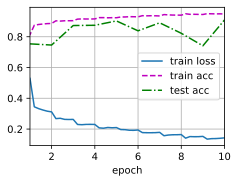

In [ ]:
lr, num_epochs, batch_size = 0.1, 10, 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)
d2l.train_ch6(DenseNet, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [31]:
# DenseNet-121
def conv_block_121(input_channels, num_channels):  # 过渡层
    return nn.Sequential(
        nn.BatchNorm2d(input_channels), nn.ReLU(),
        nn.Conv2d(input_channels, 4 * num_channels, kernel_size=1),  # 按原作加个BottleNeck
        nn.BatchNorm2d(4 * num_channels), nn.ReLU(),
        nn.Conv2d(4 * num_channels, num_channels, kernel_size=3, padding=1))

class DenseBlock_121(nn.Module):
    def __init__(self, num_convs, input_channels, num_channels):
        super(DenseBlock_121, self).__init__()
        layer = []
        for i in range(num_convs):
            layer.append(conv_block_121(
                num_channels * i + input_channels, num_channels))
        self.net = nn.Sequential(*layer)

    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
            X = torch.cat((X, Y), dim=1)
        return X

b1 = nn.Sequential(
    nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
    nn.BatchNorm2d(64), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

num_convs_in_dense_blocks_121 = [6, 12, 24, 16]
num_channels, growth_rate = 64, 32
blks_121 = []
for i, num_convs in enumerate(num_convs_in_dense_blocks_121):
    blks_121.append(DenseBlock_121(num_convs, num_channels, growth_rate))
    num_channels += num_convs * growth_rate
    if i != len(num_convs_in_dense_blocks_121) - 1:
        blks_121.append(conv_block_121(num_channels, num_channels // 2))
        num_channels = num_channels // 2

net3 = nn.Sequential(
    b1, *blks_121,
    nn.BatchNorm2d(num_channels), nn.ReLU(),
    nn.AdaptiveAvgPool2d((1, 1)),
    nn.Flatten(),
    nn.Linear(num_channels, 10))

lr, num_epochs, batch_size = 0.1, 10, 64
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)
# d2l.train_ch6(net3, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())
# 跑不了一点，batch_size都调到 64 了，还是爆显存，看看 shape 得了
# CUDA out of memory. Tried to allocate 90.00 MiB (GPU 0; 4.00 GiB total capacity; 2.49 GiB already allocated; 19.80 MiB free; 2.74 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

X = torch.rand(size=(1, 1, 224, 224))  # 好吧，看个 shape 都得 6.5 秒
for layer in net3:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)


Sequential output shape:	 torch.Size([1, 64, 56, 56])
DenseBlock_121 output shape:	 torch.Size([1, 256, 56, 56])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
DenseBlock_121 output shape:	 torch.Size([1, 512, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 56, 56])
DenseBlock_121 output shape:	 torch.Size([1, 1024, 56, 56])
Sequential output shape:	 torch.Size([1, 512, 56, 56])
DenseBlock_121 output shape:	 torch.Size([1, 1024, 56, 56])
BatchNorm2d output shape:	 torch.Size([1, 1024, 56, 56])
ReLU output shape:	 torch.Size([1, 1024, 56, 56])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 1024, 1, 1])
Flatten output shape:	 torch.Size([1, 1024])
Linear output shape:	 torch.Size([1, 10])


[参考答案](https://blog.csdn.net/qq_43941037/article/details/133229973)

## 深度学习网络架构比较

### 1. LeNet
**历史**：
- **提出者**：Yann LeCun 等人
- **提出时间**：1989 年
- **主要应用**：手写数字识别（如 MNIST 数据集）

**优点**：
- 开创性地将卷积层和池化层引入神经网络架构。
- 证明了卷积神经网络（CNN）在图像识别中的有效性。

**缺点**：
- 网络较浅，只适用于简单任务。
- 对复杂图像数据集表现不佳。

**实现**：
- 卷积层：2 层
- 池化层：2 层
- 全连接层：3 层

**性能**：
- 适用于简单任务（如手写数字识别）。
- 网络较浅，参数较少，计算开销低。

### 2. AlexNet
**历史**：
- **提出者**：Alex Krizhevsky 等人
- **提出时间**：2012 年
- **主要应用**：ImageNet 图像分类挑战赛（ILSVRC）

**优点**：
- 引入了 ReLU 激活函数，加速训练过程。
- 使用了 Dropout 技术，减少过拟合。
- 在 ImageNet 比赛中取得了巨大成功，带动了深度学习的热潮。

**缺点**：
- 网络较大，对计算资源要求高。
- 使用的数据增强和大规模并行计算需要硬件支持。

**实现**：
- 卷积层：5 层
- 池化层：3 层
- 全连接层：3 层
- 使用 ReLU 激活函数和 Dropout 技术

**性能**：
- 在 ImageNet 上大幅提升了图像分类的性能。
- 对计算资源要求较高，需要 GPU 支持。

### 3. VGG
**历史**：
- **提出者**：Karen Simonyan 和 Andrew Zisserman
- **提出时间**：2014 年
- **主要应用**：图像分类和目标检测

**优点**：
- 使用了非常统一的卷积层设计（3x3 卷积核），结构简单且容易理解。
- 在多个计算机视觉任务中表现良好。

**缺点**：
- 参数量巨大，计算成本高。
- 训练和推理速度较慢，需要大量存储和内存。

**实现**：
- 卷积层：16-19 层（所有卷积核均为 3x3）
- 池化层：5 层
- 全连接层：3 层

**性能**：
- 在多个视觉任务上表现出色。
- 参数量巨大，训练和推理速度较慢。

### 4. Network in Network (NiN)
**历史**：
- **提出者**：Min Lin 等人
- **提出时间**：2013 年
- **主要应用**：图像分类

**优点**：
- 引入了 1x1 卷积层，增加网络的表达能力。
- 提出了全局平均池化，减少参数量，防止过拟合。

**缺点**：
- 尽管提出了一些创新思想，但在实际应用中未能取得像 AlexNet 或 VGG 那样的广泛影响。

**实现**：
- 卷积层：引入 1x1 卷积层
- 全局平均池化层代替全连接层

**性能**：
- 增强了网络的表达能力，减少参数量。
- 在一些任务上表现良好，但未能广泛应用。

### 5. GoogLeNet (Inception)
**历史**：
- **提出者**：Christian Szegedy 等人
- **提出时间**：2014 年
- **主要应用**：ImageNet 图像分类挑战赛

**优点**：
- 引入了 Inception 模块，实现了计算效率和效果的平衡。
- 通过多种卷积核尺寸的组合，捕捉到更多特征。

**缺点**：
- 网络结构复杂，设计和调试难度较大。
- Inception 模块的设计需要大量超参数调试。

**实现**：
- Inception 模块：包含不同尺寸卷积核和池化操作的组合
- 网络深度：22 层（GoogLeNet v1）

**性能**：
- 在 ImageNet 上取得了极高的精度和效率。
- 参数量较少，计算成本低。

### 6. ResNet
**历史**：
- **提出者**：Kaiming He 等人
- **提出时间**：2015 年
- **主要应用**：图像分类、目标检测、图像分割等

**优点**：
- 引入了残差连接，解决了深度网络的梯度消失问题。
- 使得训练非常深的网络成为可能，在多个任务上表现优异。

**缺点**：
- 虽然残差网络结构有效，但也增加了网络的复杂性。
- 高深度的网络仍然对计算资源要求较高。

**实现**：
- 残差块：引入跳跃连接（skip connections）
- 网络深度：多种变体（如 ResNet-50、ResNet-101、ResNet-152）

**性能**：
- 解决了深度网络的梯度消失问题，支持训练极深的网络。
- 在多个视觉任务中表现优异。

### 7. DenseNet
**历史**：
- **提出者**：Gao Huang 等人
- **提出时间**：2016 年
- **主要应用**：图像分类、目标检测、图像分割等

**优点**：
- 引入了密集连接，每一层与前面所有层直接连接，促进特征复用。
- 减少了梯度消失问题，提升了特征传播和梯度流动。

**缺点**：
- 网络参数较多，训练和推理的计算成本较高。
- 需要更多的内存和存储空间来处理密集连接。

**实现**：
- 密集连接：每一层与前面所有层直接连接
- 网络深度：多种变体（如 DenseNet-121、DenseNet-169、DenseNet-201）

**性能**：
- 有效缓解了梯度消失问题，提升特征复用和传递。
- 在多个视觉任务中表现出色。

### 综合对比
**实现复杂度**：
- 最简单：LeNet
- 中等复杂度：AlexNet, VGG
- 高复杂度：GoogLeNet, ResNet, DenseNet

**计算资源需求**：
- 最低：LeNet
- 中等：AlexNet, VGG
- 最高：GoogLeNet, ResNet, DenseNet

**性能和应用范围**：
- LeNet：适用于简单任务和小规模数据集。
- AlexNet：标志着深度学习的崛起，适用于大规模图像分类。
- VGG：在多个任务上表现良好，但计算成本高。
- NiN：有创新思想，但未广泛应用。
- GoogLeNet：高效且性能优异，适用于大规模图像分类。
- ResNet：解决了深度网络的训练问题，适用于各种复杂任务。
- DenseNet：通过密集连接提升性能，适用于高效特征复用和深度网络。
